# Make Main Sample

In [111]:
#------ IMPORTING -------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from astropy.io import fits

# 1.List: all planets


In [112]:
# ------- LIST OF PLANETS FROM PLANET S----------

#raw.rdb downloaded from DACE planetS catalog
#12.11.2024

table_file = '/home/hannakasperer/Dissertation-/Sample/DACE_export/raw.rdb'
big_planet_list_all = pd.read_csv(table_file, sep='\t') 

columns_all = list(big_planet_list_all.columns)
print("all columns from planetS:",columns_all)

#choose columns for my main list
columns = ['planet_name', 'period',
                   'planet_mass', 'planet_radius', 
                   'planet_mass_rel_err', 'planet_radius_rel_err',
                   'gaia_dr3_id','stellar_eff_temp', 'stellar_surface_gravity','stellar_metallicity',
                   'stellar_metallicity_upper', 'stellar_metallicity_lower', 'stellar_metallicity_ratio'
                   ]

big_planet_list = big_planet_list_all[columns]

#create column list
columns_list = list(big_planet_list.columns)
print("choosen columns:",columns_list)

#print(df_filtered)
#print(df) #whole list
#print(df.columns.tolist()) #list of columns

all columns from planetS: ['planet_name', 'reference', 'period', 'planet_mass', 'planet_radius', 'planet_mass_rel_err', 'planet_radius_rel_err', 'planet_letter', 'tic_id', 'gaia_dr3_id', 'discovery_year', 'discovery_method', 'discovery_facility', 'discovery_locale', 'number_stars', 'number_planets', 'ads_link', 'last_updated', 'planet_mass_upper', 'planet_mass_lower', 'planet_msini', 'planet_msini_upper', 'planet_msini_lower', 'planet_radius_upper', 'planet_radius_lower', 'period_upper', 'period_lower', 'semi_major_axis', 'semi_major_axis_upper', 'semi_major_axis_lower', 'semi_major_axis_source', 'ecc', 'ecc_upper', 'ecc_lower', 'ecc_upper_flag', 'insolation_flux', 'insolation_flux_upper', 'insolation_flux_lower', 'equilibrium_temp', 'equilibrium_temp_upper', 'equilibrium_temp_lower', 'inclination', 'inclination_upper', 'inclination_lower', 'projected_obliquity', 'projected_obliquity_upper', 'projected_obliquity_lower', 'projected_obliquity_ref', 'epoch_periastron', 'epoch_periastron_u

In [113]:
# ----- COUNTING INITIAL PLANET S LIST -------

#count planets
df_rowcut = big_planet_list.iloc[3:] 
row_count = df_rowcut.shape[0]  
print("Number of planets in inital planetS list:", row_count)

#count stars
star_count = big_planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 765 PLANETS (inital planetS list):",star_count)

Number of planets in inital planetS list: 765
STAR COUNT FOR 765 PLANETS (inital planetS list): 698


In [114]:
#save 1.list as big_planet_list_date 
path = '/home/hannakasperer/Dissertation-/Sample/big_planet_list_141024'
big_planet_list.to_csv(path, index=False)
print(big_planet_list)

     planet_name      period    planet_mass  planet_radius  \
0           Name           P  M<sub>p</sub>  R<sub>p</sub>   
1              -         DAY    JUPITERMASS  JUPITERRADIUS   
2    -----------      ------    -----------  -------------   
3       55 Cnc e   0.7365474        0.02514          0.167   
4      CoRoT-1 b   1.5089557           1.03           1.49   
..           ...         ...            ...            ...   
763       XO-3 b  3.19153285           11.7          1.217   
764       XO-4 b   4.1250823          1.612           1.34   
765       XO-5 b  4.18775581          1.046          1.109   
766       XO-7 b   2.8641424          0.709          1.373   
767     pi Men c    6.267852         0.0135         0.1882   

     planet_mass_rel_err  planet_radius_rel_err          gaia_dr3_id  \
0    Relative Mass Error  Relative Radius Error          Gaia DR3 ID   
1                      -                      -                    -   
2    -------------------  -------------

# 2. List: Filtered by R < Re and Teff > 4900 k

In [115]:
#------- FILTER BY THESE CRITERIA -------
# radius < 2 Re 
# Teff > 4900 K --> same unit

In [116]:
#PREPARING THE 1.LIST:

#cut the first 3 rows because they are only the headers of the columns
big_planet_list_numbers = big_planet_list.iloc[3:]

#turn everything to numeric values
big_planet_list_numbers.loc[:, 'planet_radius'] = pd.to_numeric(big_planet_list_numbers['planet_radius'])
big_planet_list_numbers.loc[:, 'stellar_eff_temp'] = pd.to_numeric(big_planet_list_numbers['stellar_eff_temp'])
big_planet_list_numbers.loc[:, 'planet_mass'] = pd.to_numeric(big_planet_list_numbers['planet_mass'])
big_planet_list_numbers.loc[:, 'stellar_surface_gravity'] = pd.to_numeric(big_planet_list_numbers['stellar_surface_gravity'])
big_planet_list_numbers.loc[:, 'stellar_metallicity'] = pd.to_numeric(big_planet_list_numbers['stellar_metallicity'])
big_planet_list_numbers.loc[:, 'stellar_metallicity_upper'] = pd.to_numeric(big_planet_list_numbers['stellar_metallicity_upper'])

In [117]:
#CREATING THE FILTERS

earth_to_jup_r = 1/11.209

radius_filter = 2 * earth_to_jup_r # R_earth
teff_filter = 4900 # K
teff_filter4000 = 4000 

#filter the big list with 2 filters
planet_list = big_planet_list_numbers[
    (big_planet_list_numbers['planet_radius'] <= radius_filter) 
    & (big_planet_list_numbers['stellar_eff_temp'] >= teff_filter)]

planet_list4000 = big_planet_list_numbers[
    (big_planet_list_numbers['planet_radius'] <= radius_filter) 
    & (big_planet_list_numbers['stellar_eff_temp'] >= teff_filter4000)]

print("PLANETS FILTERED BY RADIUS AND Teff:\n")
print(planet_list)

PLANETS FILTERED BY RADIUS AND Teff:

          planet_name      period planet_mass planet_radius  \
3            55 Cnc e   0.7365474     0.02514         0.167   
23          CoRoT-7 b      0.8535     0.01905         0.136   
26   EPIC 220674823 b    0.571292     0.02583         0.154   
28   EPIC 249893012 b      3.5951     0.02753         0.174   
163          K2-229 b    0.584249     0.00815         0.104   
164       HD 136352 b    11.57797     0.01485         0.148   
167       HD 137496 b     1.62116     0.01271         0.117   
171        HD 15337 b     4.75642     0.02265         0.152   
180        HD 20329 b    0.926118     0.02335         0.153   
183       HD 213885 b    1.008035     0.02778         0.156   
194         HD 3167 b  0.95965428     0.01488         0.145   
205        HD 80653 b    0.719573       0.018         0.144   
215       HIP 29442 c     3.53796     0.01416         0.141   
218          K2-111 b      5.3518     0.01756         0.162   
221          K2-1

In [118]:
# ----- COUNTING FILTERED PLANETS LIST -------

#count planets
row_count1 = planet_list.shape[0]  
print("Number of planets < 2 Re and > 4900 K Teff:", row_count1)

#count stars
star_count1 = planet_list['gaia_dr3_id'].nunique()
print("Number of stars < 2 Re planet and > 4900 K Teff:",star_count1)

Number of planets < 2 Re and > 4900 K Teff: 36
Number of stars < 2 Re planet and > 4900 K Teff: 35


In [119]:
#save 2.list as planet_list
path = '/home/hannakasperer/Dissertation-/Sample/planet_list'
planet_list.to_csv(path, index=False)

# 3.List: Crossfit with ESPRESSO spectra archive

In [120]:
#crossfit: planet_list with ESPRESSO spectra archive

#1.step: make a table only with GAIA DR3 ID of stars 
# ----> to put into the ESO archive

columns = ['gaia_dr3_id'] 
dr3 = planet_list[columns]
#print(dr3) #this is a table of all the stars ID in planet_list (WITH DUPLICATS so 52 entries)

#add GAIA DR3 to every row
def prepend_gaia(entry):
    return f"GAIA DR3 {entry}"

dr3_modified = dr3.applymap(prepend_gaia)

output_file = 'dr3.txt'
with open(output_file, 'w') as f:
    for index, row in dr3_modified.iterrows():
        f.write('\t'.join(row) + '\n')

print(f"Data written to {output_file}")


Data written to dr3.txt


In [121]:
#2.step:
#----> put dr3.txt into ESPRESSO data set 
#OUTPUT OF THE ARCHIVE--> spectra.txt with info on which spectras exist (BUT JUST THE COPIED TEXT of the end of the query)

#----- clean this .txt so i can work with it here ------
#read only GAIA DR3 ID and Number of spectra out of the .txt (archive output)

input_file = '/home/hannakasperer/Dissertation-/Sample/spectra.txt'   
output_file = '/home/hannakasperer/Dissertation-/Sample/spectra_clear.txt' 

pattern = r"(GAIA DR3 \d+).*?(\d+) records"

extracted_data = []

with open(input_file, 'r') as f:
    for line in f:
        match = re.search(pattern, line)
        if match:
            gaia_info = match.group(1)  # GAIA DR3 info
            spectra_count = match.group(2)  # Number of records
            extracted_data.append(f"{gaia_info} {spectra_count}")

with open(output_file, 'w') as f:
    for entry in extracted_data:
        f.write(entry + '\n')

print(f"Data extracted and written to {output_file}")

Data extracted and written to /home/hannakasperer/Dissertation-/Sample/spectra_clear.txt


In [122]:
#OUTPUT---> spectra_clear with two columns GAIA DR3 INFO and Number of spectra in text file

spectra_records = {}

spectra_clear = '/home/hannakasperer/Dissertation-/Sample/spectra_clear.txt'

with open(spectra_clear, 'r') as f:
    for line in f:
        parts = line.split() #split it
        if len(parts) >= 3:
            gaia_id = ' '.join(parts[2:3])  #1. column: ignore "GAIA DR3"
            spectra_count = int(parts[3])  #2. column: number for spectra
            spectra_records[gaia_id] = spectra_count 

In [123]:
#3.step:
#match GAIA DR3 column from planet list with GAIA DR3 from spectra_clear

spectras = list(spectra_records.items())
spectra_list = pd.DataFrame(spectras, columns=['gaia_dr3_id', 'Number of Spectra'])
#spectra list now has the stars ID and the number of spectra

#CROSSMATCH
planets_spectra = pd.merge(planet_list, spectra_list, on='gaia_dr3_id', how='inner')

planets_spectra4000 = pd.merge(planet_list4000, spectra_list, on='gaia_dr3_id', how='inner')

#DISREGARD ALL THE PLANETS WITHOUT SPECTRA
planets_with_spectra = planets_spectra[planets_spectra['Number of Spectra'] != 0]
planets_with_spectra4000 = planets_spectra4000[planets_spectra4000['Number of Spectra'] != 0]

#3 LIST: PLANETS WITH HOSTSTARS THAT HAVE SPECTRA IN ESO ARCHIVE
planets_with_spectra4000

,planet_name,period,planet_mass,planet_radius,planet_mass_rel_err,planet_radius_rel_err,gaia_dr3_id,stellar_eff_temp,stellar_surface_gravity,stellar_metallicity,stellar_metallicity_upper,stellar_metallicity_lower,stellar_metallicity_ratio,Number of Spectra
0,55 Cnc e,0.7365474,0.02514,0.167,0.0407716785998408,0.0179640718562874,704967037090946688,5172.0,4.43,0.35,0.1,0.1,[Fe/H],4
1,CoRoT-7 b,0.8535,0.01905,0.136,0.10761154855643,0.0441176470588235,3107267177757848576,5250.0,NaN,NaN,NaN,NaN,NaN,3
2,EPIC 220674823 b,0.571292,0.02583,0.154,0.0913666279519938,0.0194805194805194,2582617711154563968,5532.0,NaN,0.11,0.05,0.05,[Fe/H],24
3,EPIC 249893012 b,3.5951,0.02753,0.174,0.124046494733019,0.043103448275862,6259263137059042048,5430.0,3.99,0.2,0.05,0.05,[Fe/H],35
4,GJ 9827 b,1.208974,0.01347,0.128,0.0794357832219747,0.0546875,2643842302456085888,4236.0,4.72,-0.29,0.03,0.03,[Fe/H],64
5,GJ 9827 c,3.648103,0.00585,0.101,0.204273504273504,0.0495049504950495,2643842302456085888,4236.0,4.72,-0.29,0.03,0.03,[Fe/H],64
6,GJ 9827 d,6.201812,0.0095,0.169,0.19,0.0769230769230769,2643842302456085888,4236.0,4.72,-0.29,0.03,0.03,[Fe/H],64
7,K2-229 b,0.584249,0.00815,0.104,0.165644171779141,0.048076923076923,3583630934082556416,5185.0,4.56,-0.06,0.02,0.02,[Fe/H],1
8,HD 136352 b,11.57797,0.01485,0.148,0.0888888888888888,0.027027027027027,5902750168276592256,5664.0,4.39,-0.24,0.05,0.05,[M/H],2
9,HD 137496 b,1.62116,0.01271,0.117,0.136113296616837,0.0384615384615384,6258810550587404672,5799.0,4.05,-0.03,0.04,0.04,[Fe/H],2


In [124]:
#planets_spectra = still includes all planets even if there is no spectra
#planets_with_spectra = shows only planets that have a host star with a spectra in ESPRESSO

In [125]:
# ----- COUNTING FILTERED PLANETS THAT HAVE SPECTRA IN ESPRESSO LIST -------

#count planets
row_count2 = planets_with_spectra.shape[0]  
print("Number of planets in filtered planet list with star spectra:", row_count2)

#count stars
star_count2 = planets_with_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 32 PLANETS (filtered planet list):",star_count2)


Number of planets in filtered planet list with star spectra: 21
STAR COUNT FOR 32 PLANETS (filtered planet list): 21


In [127]:
#save this as planets_with_hoststar_spectra 
path = '/home/hannakasperer/Dissertation-/Sample/main_sample.csv'
planets_with_spectra.to_csv(path, index=False)

#THIS IS MY MAIN LIST!!!!

## 4. extension with the moog abundances


In [128]:
path = '/home/hannakasperer/Dissertation-/Sample/main_sample.csv'
main_sample = pd.read_csv(path)

In [129]:
main_sample

,planet_name,period,planet_mass,planet_radius,planet_mass_rel_err,planet_radius_rel_err,gaia_dr3_id,stellar_eff_temp,stellar_surface_gravity,stellar_metallicity,stellar_metallicity_upper,stellar_metallicity_lower,stellar_metallicity_ratio,Number of Spectra
0,55 Cnc e,0.736547,0.02514,0.167,0.040772,0.017964,704967037090946688,5172.0,4.43,0.350,0.100,0.100,[Fe/H],4
1,CoRoT-7 b,0.853500,0.01905,0.136,0.107612,0.044118,3107267177757848576,5250.0,NaN,NaN,NaN,NaN,NaN,3
2,EPIC 220674823 b,0.571292,0.02583,0.154,0.091367,0.019481,2582617711154563968,5532.0,NaN,0.110,0.050,0.050,[Fe/H],24
3,EPIC 249893012 b,3.595100,0.02753,0.174,0.124046,0.043103,6259263137059042048,5430.0,3.99,0.200,0.050,0.050,[Fe/H],35
4,K2-229 b,0.584249,0.00815,0.104,0.165644,0.048077,3583630934082556416,5185.0,4.56,-0.060,0.020,0.020,[Fe/H],1
5,HD 136352 b,11.577970,0.01485,0.148,0.088889,0.027027,5902750168276592256,5664.0,4.39,-0.240,0.050,0.050,[M/H],2
6,HD 137496 b,1.621160,0.01271,0.117,0.136113,0.038462,6258810550587404672,5799.0,4.05,-0.030,0.040,0.040,[Fe/H],2
7,HD 15337 b,4.756420,0.02265,0.152,0.112583,0.032895,5068777809824976256,5131.0,4.37,0.030,0.040,0.040,[Fe/H],2
8,HD 20329 b,0.926118,0.02335,0.153,0.146895,0.039216,30398648945512960,5596.0,4.40,-0.070,0.060,0.060,[Fe/H],3
9,HD 213885 b,1.008035,0.02778,0.156,0.074334,0.032051,6407428994690988928,5978.0,4.38,-0.040,0.030,0.030,[Fe/H],2


In [130]:
path = '/home/hannakasperer/Dissertation-/Sample/gaiadr3_output_ew_sample.csv'
columns_to_load = ['source_id', 'target_id'] 
name_to_ids = pd.read_csv(path, usecols=columns_to_load)

#add the 4 additional star

new_rows = pd.DataFrame({
    'source_id': ['2643842302456085888', '2993561629444856960','2318295979126499200','2405081733281425280'],
    'target_id': ['GJ9827','TOI-469','TOI-178','TOI-238']
})

name_to_ids = pd.concat([name_to_ids, new_rows], ignore_index=True)

name_to_ids

,source_id,target_id
0,704967037090946688,55Cnc
1,6230733559097425152,CD-2312010
2,2908664557091200768,CD-262288
3,5509620021956148736,CD-472804
4,5287888182069257344,CD-63345
5,3107267177757848576,CoRoT-07
6,5902750168276592256,HD136352
7,6258810550587404672,HD137496
8,30398648945512960,HD20329
9,6407428994690988928,HD213885


In [131]:
path = '/home/hannakasperer/Desktop/AbundMOOG/all_abundances_ordered_star.rdb'
abundances = pd.read_csv(path,sep="\t")
len(abundances)

28

In [132]:
path = '/home/hannakasperer/Desktop/AbundMOOG/all_abundances_ordered_star.rdb'
abundances = pd.read_csv(path,sep="\t")
abundances_hot = abundances[abundances['teff'] > 4900]
abundances_hot

,star,teff,erteff,logg,erlogg,vtur,ervtur,feh,erfeh,NaI,...,MgI_rel_sun,SiI,SiI_err,SiI_rel_sun,TiI,TiI_err,TiI_rel_sun,NiI,NiI_err,NiI_rel_sun
0,55Cnc_SINGLEHR11_ESPRESSO_2022,5310,51,4.211,0.116,0.907,0.069,0.299,0.033,6.931,...,0.379,7.927,0.041,0.356,5.415,0.102,0.403,6.640,0.070,0.372
4,CoRoT-07_ESPRESSO_2024,5269,31,4.381,0.070,0.694,0.061,0.044,0.020,6.456,...,-0.019,7.655,0.052,0.084,5.121,0.074,0.109,6.312,0.041,0.044
5,HD136352_SINGLEHR11_ESPRESSO_2022,5652,16,4.371,0.030,0.880,0.028,-0.353,0.013,6.082,...,-0.133,7.359,0.014,-0.212,4.856,0.035,-0.156,5.920,0.024,-0.348
6,HD137496_ESPRESSO_2024,5797,18,4.093,0.025,1.129,0.022,-0.034,0.014,6.260,...,0.008,7.551,0.014,-0.020,5.009,0.031,-0.003,6.191,0.021,-0.077
7,HD20329_ESPRESSO_2024,5574,17,4.285,0.031,0.824,0.028,-0.106,0.014,6.325,...,0.135,7.601,0.021,0.030,5.129,0.036,0.117,6.192,0.019,-0.076
8,HD213885_ESPRESSO_2024,5906,17,4.427,0.025,1.043,0.025,-0.005,0.013,6.402,...,-0.019,7.563,0.013,-0.008,5.018,0.028,0.006,6.250,0.020,-0.018
10,HD285181_ESPRESSO_2024,5554,21,4.436,0.043,0.837,0.037,0.107,0.016,6.422,...,0.080,7.667,0.051,0.096,5.139,0.031,0.127,6.339,0.025,0.071
11,HD3167_ESPRESSO_2024,5228,32,4.285,0.064,0.676,0.056,-0.019,0.021,6.402,...,0.014,7.609,0.031,0.038,5.068,0.081,0.056,6.268,0.045,0.000
12,HD80653_ESPRESSO_2024,5951,18,4.330,0.041,1.119,0.021,0.344,0.014,6.896,...,0.308,7.915,0.024,0.344,5.332,0.035,0.320,6.649,0.024,0.381
13,K2-106_ESPRESSO_2024,5505,24,4.338,0.040,0.738,0.037,0.080,0.017,6.498,...,0.074,7.627,0.011,0.056,5.107,0.040,0.095,6.317,0.031,0.049


In [133]:
#add the gaia dr3 IDs to the abundance list

abundances["base_star"] = abundances["star"].str.split("_").str[0]
abundances["base_star"] = abundances["base_star"].str.lower()
name_to_ids["target_id"] = name_to_ids["target_id"].str.lower()

#merge id list and abundances based on star name
abundances_id = pd.merge(abundances, name_to_ids, left_on="base_star", right_on="target_id", how="right")
abundances_id.drop(columns=["base_star"], inplace=True)

print(abundances_id)

                                 star    teff  erteff   logg  erlogg   vtur  \
0      55Cnc_SINGLEHR11_ESPRESSO_2022  5310.0    51.0  4.211   0.116  0.907   
1            CD-2312010_ESPRESSO_2024  4432.0   154.0  4.237   0.510  0.011   
2             CD-262288_ESPRESSO_2024  4715.0    98.0  4.018   0.263  0.635   
3             CD-472804_ESPRESSO_2024  4530.0   178.0  4.095   0.494  0.166   
4                                 NaN     NaN     NaN    NaN     NaN    NaN   
5              CoRoT-07_ESPRESSO_2024  5269.0    31.0  4.381   0.070  0.694   
6   HD136352_SINGLEHR11_ESPRESSO_2022  5652.0    16.0  4.371   0.030  0.880   
7              HD137496_ESPRESSO_2024  5797.0    18.0  4.093   0.025  1.129   
8               HD20329_ESPRESSO_2024  5574.0    17.0  4.285   0.031  0.824   
9              HD213885_ESPRESSO_2024  5906.0    17.0  4.427   0.025  1.043   
10             HD213885_ESPRESSO_2024  5906.0    17.0  4.427   0.025  1.043   
11              HD23472_ESPRESSO_2024  4687.0   127.

In [134]:
abundances_id["source_id"] = abundances_id["source_id"].astype(str)
main_sample["gaia_dr3_id"] = main_sample["gaia_dr3_id"].astype(str)

main_sample_ab = pd.merge(abundances_id, main_sample, left_on="source_id", right_on="gaia_dr3_id", how="right")

main_sample4000 = pd.merge(abundances_id, planets_with_spectra4000, left_on="source_id", right_on="gaia_dr3_id", how="right")

main_sample4000

,star,teff,erteff,logg,erlogg,vtur,ervtur,feh,erfeh,NaI,...,planet_mass_rel_err,planet_radius_rel_err,gaia_dr3_id,stellar_eff_temp,stellar_surface_gravity,stellar_metallicity,stellar_metallicity_upper,stellar_metallicity_lower,stellar_metallicity_ratio,Number of Spectra
0,55Cnc_SINGLEHR11_ESPRESSO_2022,5310.0,51.0,4.211,0.116,0.907,0.069,0.299,0.033,6.931,...,0.0407716785998408,0.0179640718562874,704967037090946688,5172.0,4.43,0.35,0.1,0.1,[Fe/H],4
1,CoRoT-07_ESPRESSO_2024,5269.0,31.0,4.381,0.070,0.694,0.061,0.044,0.020,6.456,...,0.10761154855643,0.0441176470588235,3107267177757848576,5250.0,NaN,NaN,NaN,NaN,NaN,3
2,K2-106_ESPRESSO_2024,5505.0,24.0,4.338,0.040,0.738,0.037,0.080,0.017,6.498,...,0.0913666279519938,0.0194805194805194,2582617711154563968,5532.0,NaN,0.11,0.05,0.05,[Fe/H],24
3,K2-314_ESPRESSO_2024,5555.0,21.0,4.023,0.039,1.008,0.026,0.163,0.017,6.556,...,0.124046494733019,0.043103448275862,6259263137059042048,5430.0,3.99,0.2,0.05,0.05,[Fe/H],35
4,GJ9827_SINGLEHR21_ESPRESSO_2022,4409.0,128.0,3.836,0.460,0.262,0.744,-0.610,0.050,6.229,...,0.0794357832219747,0.0546875,2643842302456085888,4236.0,4.72,-0.29,0.03,0.03,[Fe/H],64
5,GJ9827_SINGLEHR21_ESPRESSO_2022,4409.0,128.0,3.836,0.460,0.262,0.744,-0.610,0.050,6.229,...,0.204273504273504,0.0495049504950495,2643842302456085888,4236.0,4.72,-0.29,0.03,0.03,[Fe/H],64
6,GJ9827_SINGLEHR21_ESPRESSO_2022,4409.0,128.0,3.836,0.460,0.262,0.744,-0.610,0.050,6.229,...,0.19,0.0769230769230769,2643842302456085888,4236.0,4.72,-0.29,0.03,0.03,[Fe/H],64
7,K2-229_ESPRESSO_2024,5126.0,34.0,4.336,0.079,0.809,0.066,-0.088,0.020,6.340,...,0.165644171779141,0.048076923076923,3583630934082556416,5185.0,4.56,-0.06,0.02,0.02,[Fe/H],1
8,HD136352_SINGLEHR11_ESPRESSO_2022,5652.0,16.0,4.371,0.030,0.880,0.028,-0.353,0.013,6.082,...,0.0888888888888888,0.027027027027027,5902750168276592256,5664.0,4.39,-0.24,0.05,0.05,[M/H],2
9,HD137496_ESPRESSO_2024,5797.0,18.0,4.093,0.025,1.129,0.022,-0.034,0.014,6.260,...,0.136113296616837,0.0384615384615384,6258810550587404672,5799.0,4.05,-0.03,0.04,0.04,[Fe/H],2


In [135]:
path = '/home/hannakasperer/Dissertation-/Sample/main_sample_ab.csv'
main_sample_ab.to_csv(path, index=False)

In [136]:
main_sample_ab

,star,teff,erteff,logg,erlogg,vtur,ervtur,feh,erfeh,NaI,...,planet_mass_rel_err,planet_radius_rel_err,gaia_dr3_id,stellar_eff_temp,stellar_surface_gravity,stellar_metallicity,stellar_metallicity_upper,stellar_metallicity_lower,stellar_metallicity_ratio,Number of Spectra
0,55Cnc_SINGLEHR11_ESPRESSO_2022,5310.0,51.0,4.211,0.116,0.907,0.069,0.299,0.033,6.931,...,0.040772,0.017964,704967037090946688,5172.0,4.43,0.350,0.100,0.100,[Fe/H],4
1,CoRoT-07_ESPRESSO_2024,5269.0,31.0,4.381,0.070,0.694,0.061,0.044,0.020,6.456,...,0.107612,0.044118,3107267177757848576,5250.0,NaN,NaN,NaN,NaN,NaN,3
2,K2-106_ESPRESSO_2024,5505.0,24.0,4.338,0.040,0.738,0.037,0.080,0.017,6.498,...,0.091367,0.019481,2582617711154563968,5532.0,NaN,0.110,0.050,0.050,[Fe/H],24
3,K2-314_ESPRESSO_2024,5555.0,21.0,4.023,0.039,1.008,0.026,0.163,0.017,6.556,...,0.124046,0.043103,6259263137059042048,5430.0,3.99,0.200,0.050,0.050,[Fe/H],35
4,K2-229_ESPRESSO_2024,5126.0,34.0,4.336,0.079,0.809,0.066,-0.088,0.020,6.340,...,0.165644,0.048077,3583630934082556416,5185.0,4.56,-0.060,0.020,0.020,[Fe/H],1
5,HD136352_SINGLEHR11_ESPRESSO_2022,5652.0,16.0,4.371,0.030,0.880,0.028,-0.353,0.013,6.082,...,0.088889,0.027027,5902750168276592256,5664.0,4.39,-0.240,0.050,0.050,[M/H],2
6,HD137496_ESPRESSO_2024,5797.0,18.0,4.093,0.025,1.129,0.022,-0.034,0.014,6.260,...,0.136113,0.038462,6258810550587404672,5799.0,4.05,-0.030,0.040,0.040,[Fe/H],2
7,TOI-402_ESPRESSO_2024,5067.0,47.0,4.201,0.119,0.568,0.098,0.054,0.027,6.582,...,0.112583,0.032895,5068777809824976256,5131.0,4.37,0.030,0.040,0.040,[Fe/H],2
8,HD20329_ESPRESSO_2024,5574.0,17.0,4.285,0.031,0.824,0.028,-0.106,0.014,6.325,...,0.146895,0.039216,30398648945512960,5596.0,4.40,-0.070,0.060,0.060,[Fe/H],3
9,HD213885_ESPRESSO_2024,5906.0,17.0,4.427,0.025,1.043,0.025,-0.005,0.013,6.402,...,0.074334,0.032051,6407428994690988928,5978.0,4.38,-0.040,0.030,0.030,[Fe/H],2


# PLOTS

#### STELLAR PLOTS WITH SPECTRA SHOWN

In [137]:
star_count_1 = big_planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 765 planets:", star_count_1)

star_count_1 = planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 52 planets:", star_count_1)

star_count_1 = planets_with_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 32 planets:", star_count_1)


STAR COUNT FOR 765 planets: 698
STAR COUNT FOR 52 planets: 35
STAR COUNT FOR 32 planets: 21


In [139]:

#stellar log g with doubles
stellar_surface_g_spectra = main_sample_ab['stellar_surface_gravity']
feh = main_sample_ab['feh']
feh_error = main_sample_ab['erfeh']

#teff spectra with doubles
teff_spectra = main_sample_ab['stellar_eff_temp']
teff_error = main_sample_ab['erteff']


out of 21 stars: 14 have a log g measurement


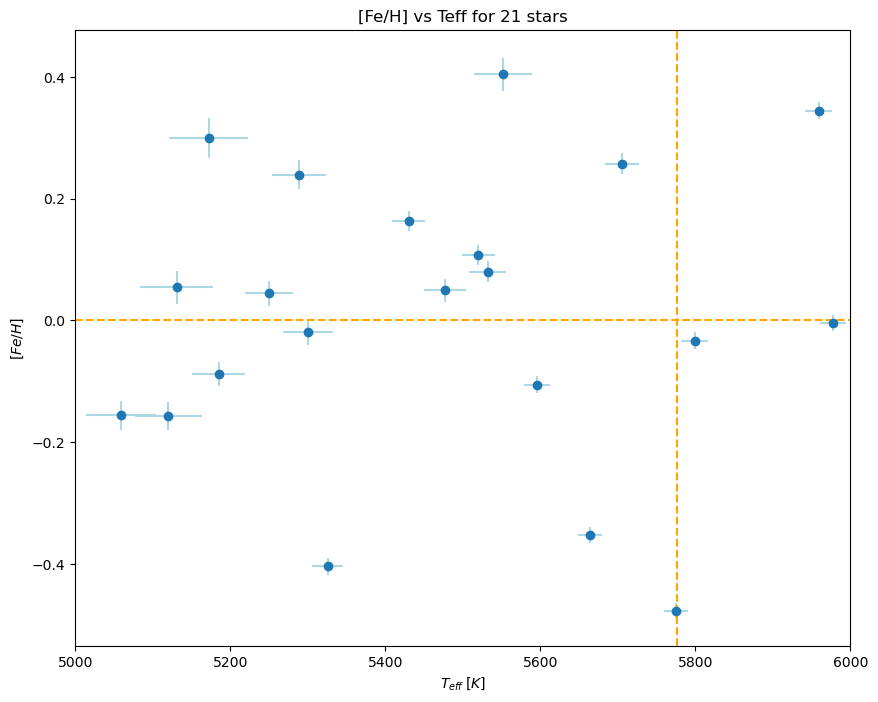

In [145]:
plt.figure(figsize=(10,8))
plt.title("[Fe/H] vs Teff for 21 stars")
plt.errorbar(teff_spectra, feh,yerr=feh_error, xerr=teff_error,fmt="o",ecolor="lightblue",label='spectra in ESPRESSO archive (29 stars)')
plt.ylabel(r'$[Fe/H]$')
plt.xlabel(r'$T_{eff} \; [K]$')
plt.axhline(0,linestyle="--",color="orange")
plt.axvline(5777,linestyle="--",color="orange")
plt.xlim(5000,6000)
plt.savefig('/home/hannakasperer/Dissertation-/Sample/stars.pdf', format='pdf')
plt.show()

47

In [155]:
#read out all the information from the list for the plots

#21
mass = main_sample_ab['planet_mass']
radius = main_sample_ab['planet_radius']
teff = main_sample_ab['stellar_eff_temp']

stellar_surface_g = main_sample_ab['stellar_surface_gravity']
stellar_metallicity = main_sample_ab['stellar_metallicity']

mass_err = main_sample_ab['planet_mass_rel_err']
radius_err = main_sample_ab['planet_radius_rel_err']

#36
mass_semi = planet_list['planet_mass']
radius_semi = planet_list['planet_radius']
teff_semi = planet_list['stellar_eff_temp']

stellar_surface_g_semi = planet_list['stellar_surface_gravity']
stellar_metallicity_semi = planet_list['stellar_metallicity']

mass_err_semi = planet_list['planet_mass_rel_err']
radius_err_semi = planet_list['planet_radius_rel_err']

#765
mass_all = big_planet_list_numbers['planet_mass']
radius_all = big_planet_list_numbers['planet_radius']
teff_all = big_planet_list_numbers['stellar_eff_temp']

stellar_surface_g_all = big_planet_list_numbers['stellar_surface_gravity']
stellar_metallicity_all = big_planet_list_numbers['stellar_metallicity']

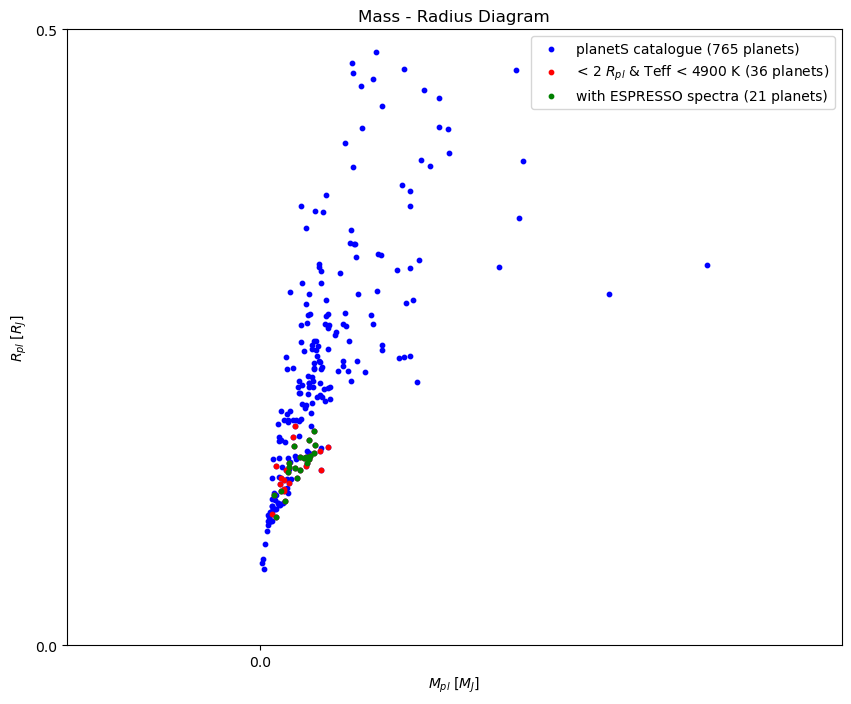

<Figure size 640x480 with 0 Axes>

In [159]:
plt.figure(figsize=(10,8))
plt.title('Mass - Radius Diagram')
plt.scatter(mass_all,radius_all,color='b', s=10,label='planetS catalogue (765 planets)')
plt.scatter(mass_semi,radius_semi,color='r', s=10,label='< 2 $R_{pl}$ & Teff < 4900 K (36 planets)')
plt.scatter(mass,radius,color='g', s=10,label='with ESPRESSO spectra (21 planets)')
plt.yticks(np.arange(0, 2.0, 0.5))
plt.xticks(np.arange(0, 2, 0.5))
plt.xlabel(r'$M_{pl} \; [M_{J}]$')
plt.ylabel(r'$R_{pl} \; [R_{J}]$')
plt.xlim(-0.1,0.3)
plt.ylim(0,0.5)
plt.legend()
plt.show()
plt.savefig('mass_radius_diagram.pdf', format='pdf')

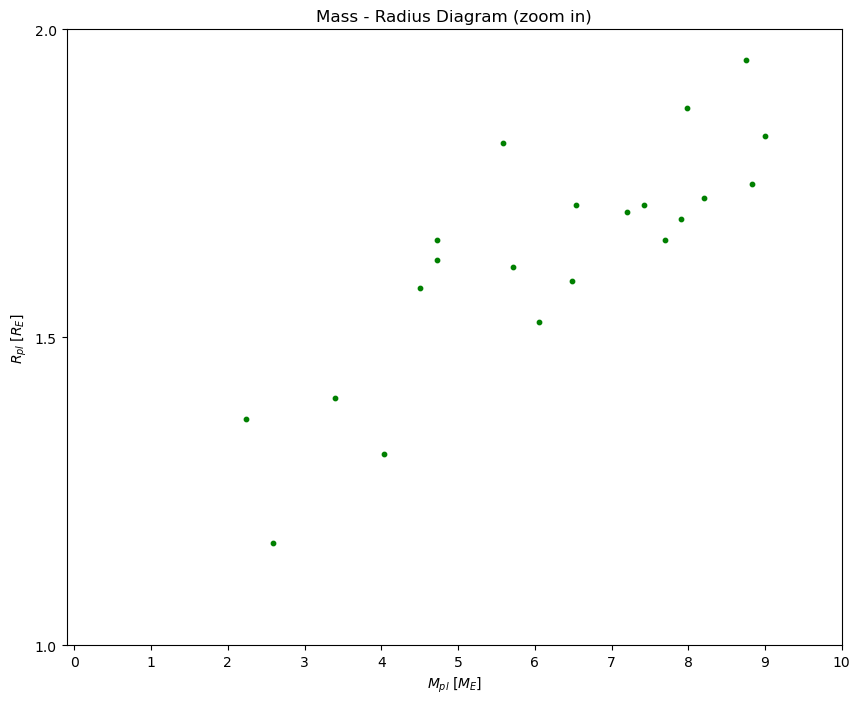

In [163]:
plt.figure(figsize=(10,8))
plt.title('Mass - Radius Diagram (zoom in)')

jup_to_earth_r = 11.209
jup_to_earth_m = 317.83

#convert them to earth units

#2nd list
radius_e = radius * jup_to_earth_r
mass_e = mass * jup_to_earth_m

radius_sigma_e = radius_err * radius_e
mass_sigma_e = mass_err * mass_e


plt.scatter(mass_e,radius_e,color='g', s=10,label='with ESPRESSO spectra (21 planets)')

plt.yticks(np.arange(0, 3, 0.5))
plt.xticks(np.arange(0, 15, 1))
plt.xlabel(r'$M_{pl} \; [M_{E}]$')
plt.ylabel(r'$R_{pl} \; [R_{E}]$')
plt.ylim(1,2)
plt.xlim(-0.1,10)
plt.savefig('/home/hannakasperer/Dissertation-/Sample/mass_radius_diagram_zoom.pdf', format='pdf')
plt.show()

In [1]:
plt.figure(figsize=(20,10))
plt.title('Stellar eff. temperature vs. Stellar surface gravity')

#plt.scatter(teff_all, stellar_surface_g_all, s=20, label='all stars')
#plt.scatter(teff,stellar_surface_g,s=60, marker ='x',label='< 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ ')

plt.scatter(teff,stellar_surface_g)

plt.ylabel(r'$log(g) \; [cm / s^{2}]$')
plt.xlabel(r'$T_{eff} \; [K]$')
plt.xticks(np.arange(2000, 10000.0, 1000))
plt.ylim(3.5,5.1)
plt.xlim(2500,9500)
plt.gca().invert_xaxis() 

plt.legend()
plt.savefig('/home/hannakasperer/Dissertation-/Sample/stellar_teff_logg.pdf', format='pdf')
plt.show()

NameError: name 'plt' is not defined

### HISTOGRAMS

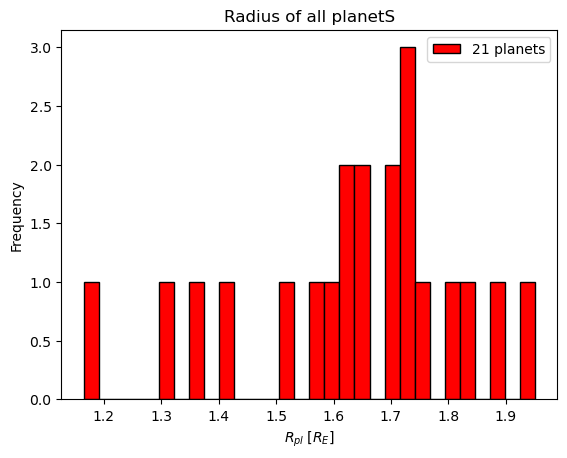

In [170]:
#plt.hist(radius_earth_all, bins=30, color='skyblue', edgecolor='black',label='765 planets from planetS')
plt.hist(radius_e, bins=30, color='red',label='21 planets',edgecolor='black',)
#plt.hist(radius_up * 10.973, bins=30, color='green', edgecolor='black')

plt.xlabel(r'$R_{pl} \; [R_{E}]$')
plt.ylabel('Frequency')
plt.title('Radius of all planetS')

plt.legend()
 
plt.show()

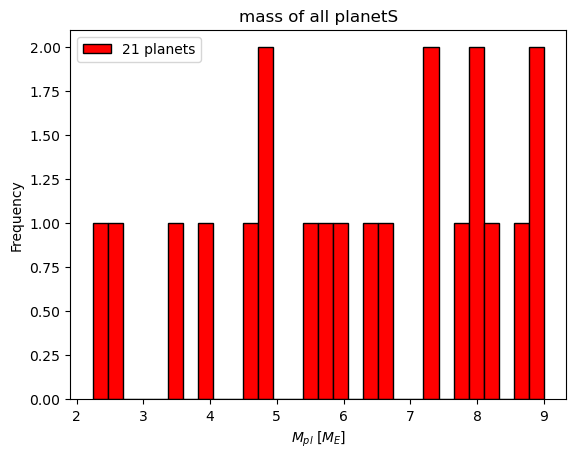

In [169]:
#plt.hist(mass_earth_all, bins=300, color='skyblue', edgecolor='black',label='765 planets from planetS')
plt.hist(mass_e, bins=30, color='red', edgecolor='black',label='21 planets')
#plt.hist(mass_up * 317.83, bins=30, color='green', edgecolor='black')

plt.xlabel(r'$M_{pl} \; [M_{E}]$')
plt.ylabel('Frequency')
plt.title('mass of all planetS')

plt.legend()
 
plt.show()